# **Introduction to Deep Model Interpretability**

Tutorial for 2019 Data Science Conference in Belgrade.

By Miloš Stojanović

# Imports

We could also do tensorflow 2.x but it was not supported at the time.


In [0]:
%tensorflow_version 1.x

In [0]:
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import urllib
import scipy
import cv2

# Part 1: Visualize and understand low level filters

## Load the pretrained model to be analyzed

Here, Keras will automatically download the pretrained weights and load the model.

In [73]:
MODEL_NAME = 'VGG'

assert MODEL_NAME in {'VGG', 'ResNet'}

if MODEL_NAME == 'VGG':
  model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=False)
  print('Model loaded.')
elif MODEL_NAME == 'ResNet':
  model = tf.keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False)
  print('Model loaded.')

model.summary()

Model loaded.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None,

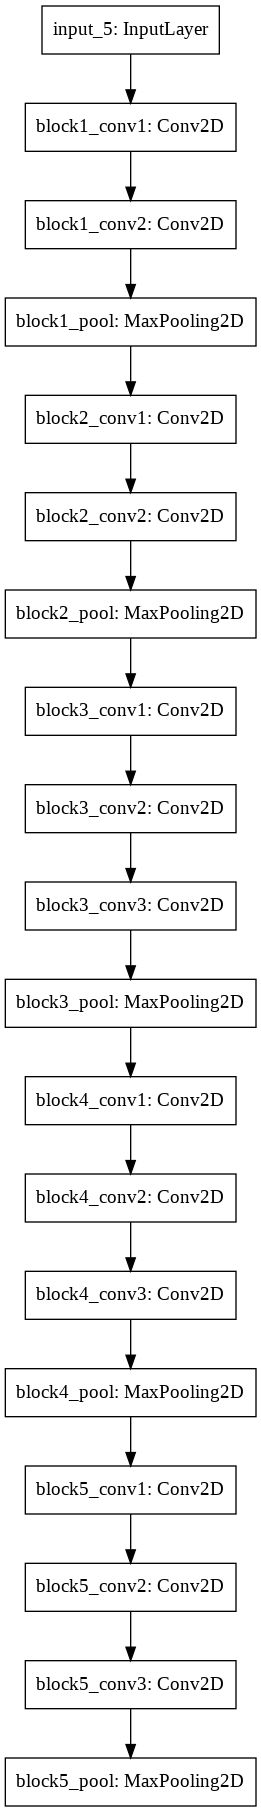

In [74]:
from tensorflow.keras.utils import plot_model
plot_model(model)

## Analyze and visualzie the weights

In [75]:
model.weights

[<tf.Variable 'block1_conv1_3/kernel:0' shape=(3, 3, 3, 64) dtype=float32>,
 <tf.Variable 'block1_conv1_3/bias:0' shape=(64,) dtype=float32>,
 <tf.Variable 'block1_conv2_3/kernel:0' shape=(3, 3, 64, 64) dtype=float32>,
 <tf.Variable 'block1_conv2_3/bias:0' shape=(64,) dtype=float32>,
 <tf.Variable 'block2_conv1_3/kernel:0' shape=(3, 3, 64, 128) dtype=float32>,
 <tf.Variable 'block2_conv1_3/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'block2_conv2_3/kernel:0' shape=(3, 3, 128, 128) dtype=float32>,
 <tf.Variable 'block2_conv2_3/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'block3_conv1_3/kernel:0' shape=(3, 3, 128, 256) dtype=float32>,
 <tf.Variable 'block3_conv1_3/bias:0' shape=(256,) dtype=float32>,
 <tf.Variable 'block3_conv2_3/kernel:0' shape=(3, 3, 256, 256) dtype=float32>,
 <tf.Variable 'block3_conv2_3/bias:0' shape=(256,) dtype=float32>,
 <tf.Variable 'block3_conv3_3/kernel:0' shape=(3, 3, 256, 256) dtype=float32>,
 <tf.Variable 'block3_conv3_3/bias:0' shape=(256,) dt

In [76]:
model.layers

In [0]:
if MODEL_NAME == 'VGG':
  weights = model.layers[1].get_weights()
elif MODEL_NAME == 'ResNet':
  weights = model.layers[2].get_weights()

In [78]:
len(weights)

2

In [0]:
kernels = weights[0]

In [80]:
kernels

array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
          -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
         [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
          -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
         [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
          -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],

        [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
          -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
         [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
          -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
         [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
          -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],

        [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
          -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
         [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
          -9.43124294e-02, -5.0566

In [81]:
kernels.shape

(3, 3, 3, 64)

**Visualize the kernel matrix**

In [82]:
K.image_data_format()

'channels_last'

<Figure size 432x288 with 0 Axes>

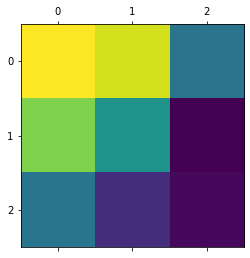

In [83]:
plt.figure()
plt.matshow(kernels[:, :, 0, 0])

<Figure size 432x288 with 0 Axes>

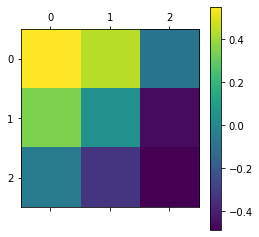

In [84]:
plt.figure()
plt.matshow(kernels[:, :, 1, 0])
plt.colorbar()

<Figure size 432x288 with 0 Axes>

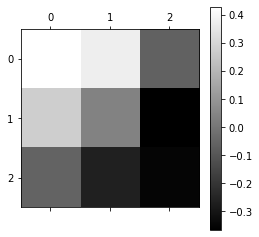

0


<Figure size 432x288 with 0 Axes>

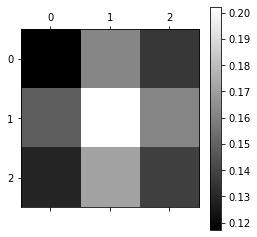

1


<Figure size 432x288 with 0 Axes>

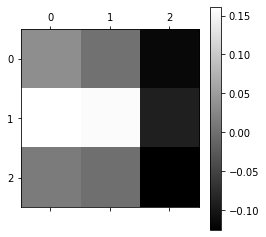

2


<Figure size 432x288 with 0 Axes>

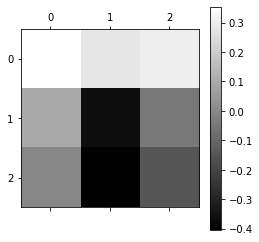

3


<Figure size 432x288 with 0 Axes>

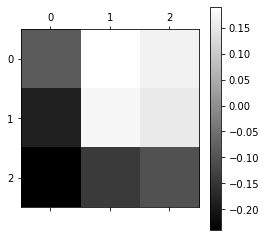

4


<Figure size 432x288 with 0 Axes>

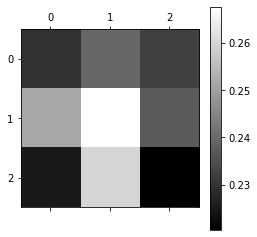

5


<Figure size 432x288 with 0 Axes>

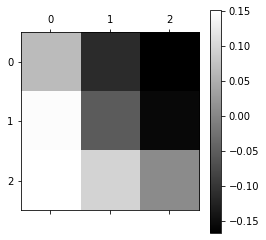

6


<Figure size 432x288 with 0 Axes>

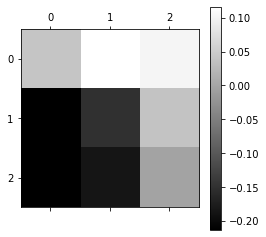

7


<Figure size 432x288 with 0 Axes>

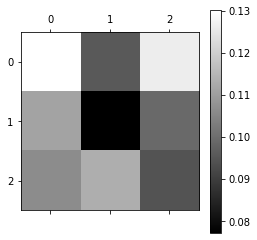

8


<Figure size 432x288 with 0 Axes>

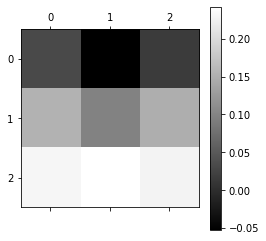

9


In [85]:
for i in range(0, 10):
  plt.figure()
  plt.matshow(kernels[:, :, 0, i], cmap='gray')  
  plt.colorbar()
  plt.show()
  print(i)

Show all 3 channels in parallel

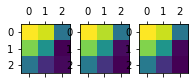

0


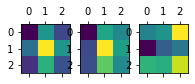

1


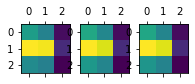

2


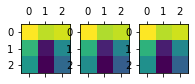

3


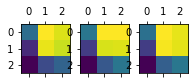

4


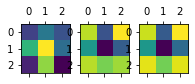

5


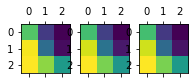

6


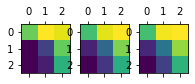

7


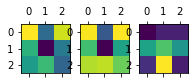

8


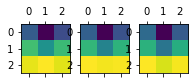

9


In [86]:
for i in range(0, 10):
  plt.figure(figsize=(3, 1))
  for j in range(0, 3):
    #plt.matshow(kernels[:, :, 0, i])
    plt.subplot(1, 3, j + 1)
    plt.matshow(kernels[:, :, j, i], fignum=False)
  #plt.colorbar()
  plt.show()
  print(i)

**Show kernels as RGB Image**

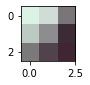

0


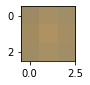

1


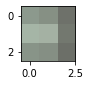

2


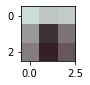

3


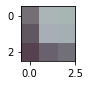

4


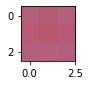

5


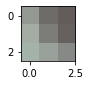

6


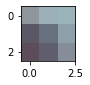

7


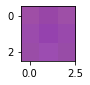

8


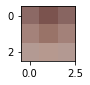

9


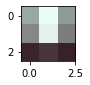

10


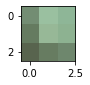

11


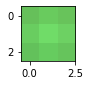

12


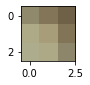

13


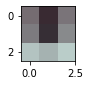

14


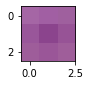

15


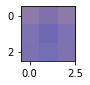

16


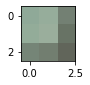

17


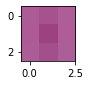

18


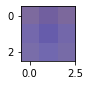

19


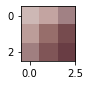

20


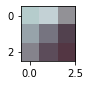

21


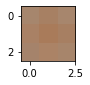

22


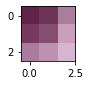

23


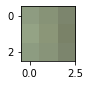

24


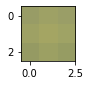

25


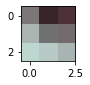

26


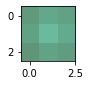

27


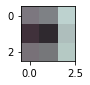

28


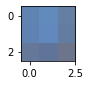

29


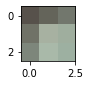

30


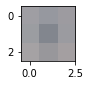

31


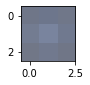

32


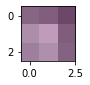

33


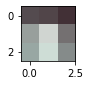

34


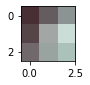

35


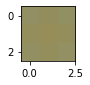

36


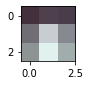

37


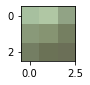

38


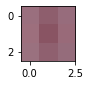

39


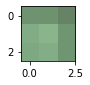

40


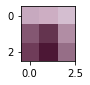

41


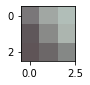

42


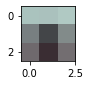

43


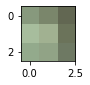

44


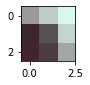

45


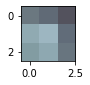

46


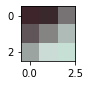

47


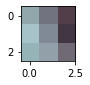

48


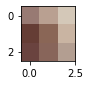

49


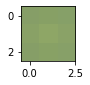

50


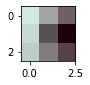

51


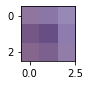

52


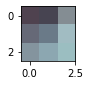

53


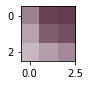

54


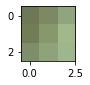

55


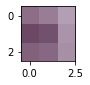

56


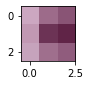

57


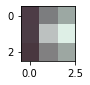

58


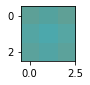

59


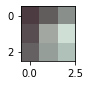

60


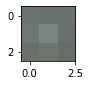

61


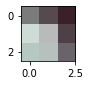

62


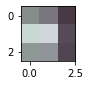

63


In [87]:
kernels_norm = (kernels - kernels.min()) / (kernels.max() - kernels.min())

for i in range(0, 64):
  plt.figure(figsize=(3, 1))
  plt.imshow((kernels_norm[:, :, :, i] * 255.0).astype(np.uint8))
  plt.show()
  print(i)

## Apply the kernel to an input image

In [0]:
url_img = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/4/41/KnezMihailova_ped.jpg')

In [0]:
img = plt.imread(url_img, format='jpg')

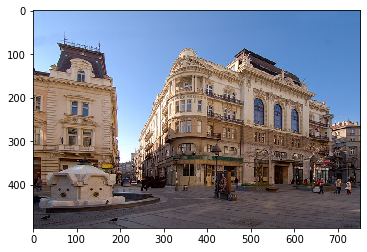

In [90]:
plt.imshow(img)

In [91]:
img.shape

(500, 752, 3)

In [0]:
img = np.expand_dims(img, axis=0)

In [93]:
img.shape

(1, 500, 752, 3)

In [0]:
#img = tf.keras.applications.vgg16.preprocess_input(img)
img = tf.keras.applications.resnet50.preprocess_input(img)

Here we use K.function to seamlessly process the data without boilerplate code.

**Try it yourself: Find horizontal edge detector in ResNet or some other interesting feature extractor in VGG**


In [0]:
#get_activation = K.function(model.input, model.layers[1].output)
get_activation = K.function(model.input, model.layers[2].output)

In [0]:
activations = get_activation(img)

In [97]:
activations.shape

(1, 500, 752, 64)

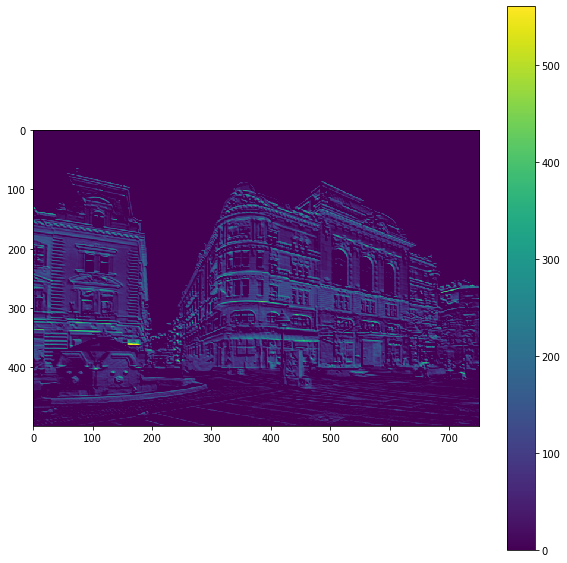

In [98]:
# ResNet layer
#   53 - horizontal edge detector
#   47 - oriented gabor filter

plt.figure(figsize=(10, 10))
plt.imshow(activations[0, :, :, 23])
plt.colorbar()

**See multiple responses**

As we see form filter and response, number 9 in ResNet is probably not that well trained.

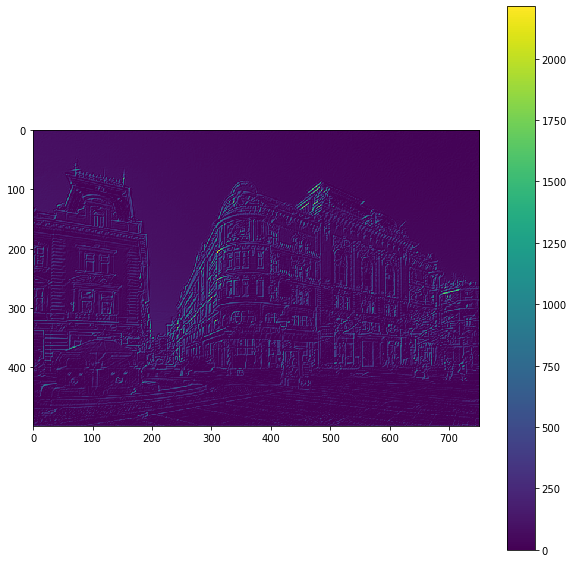

0


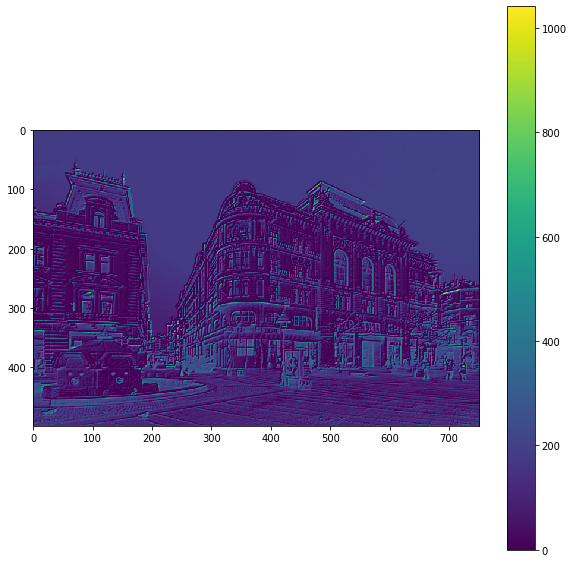

1


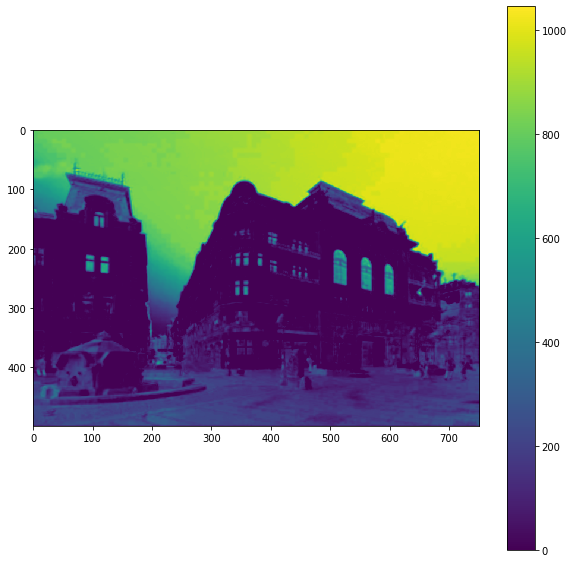

2


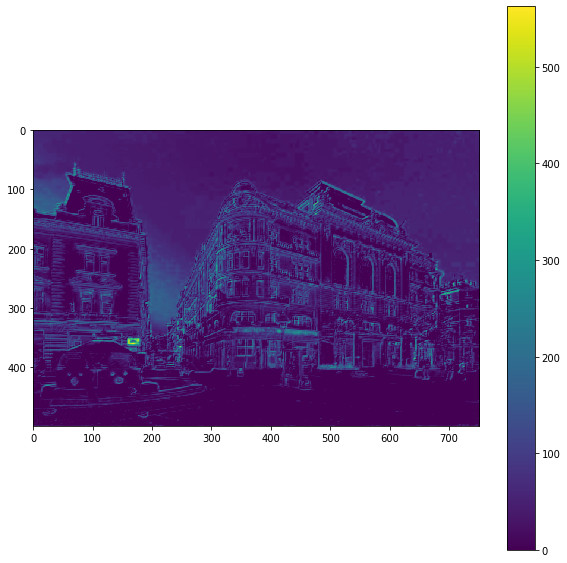

3


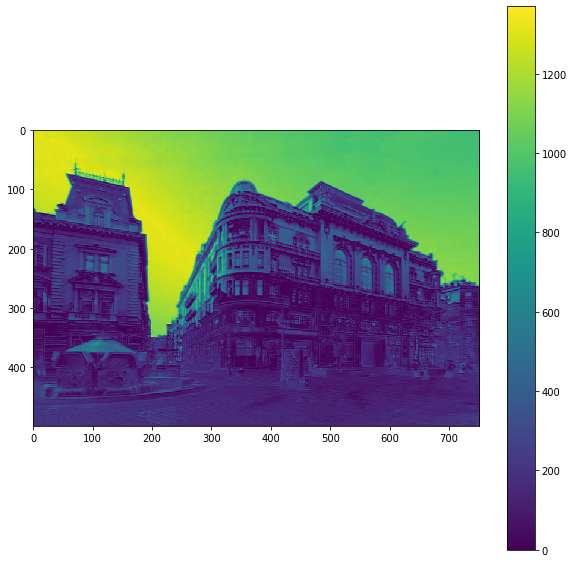

4


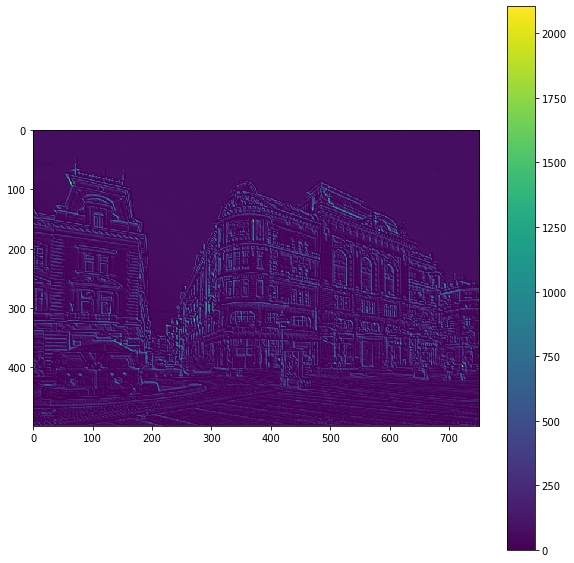

5


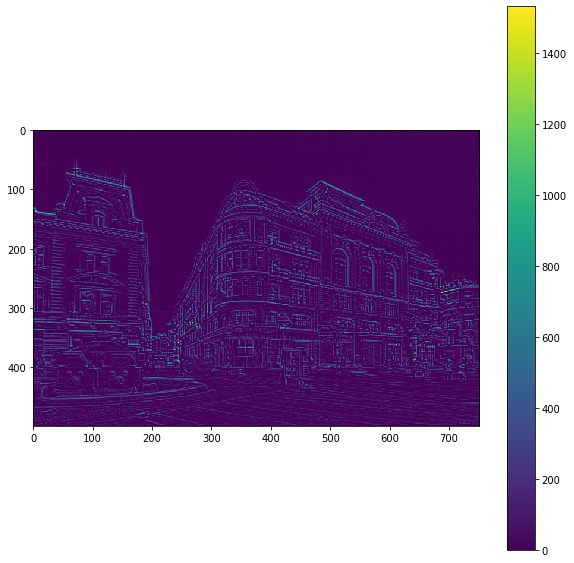

6


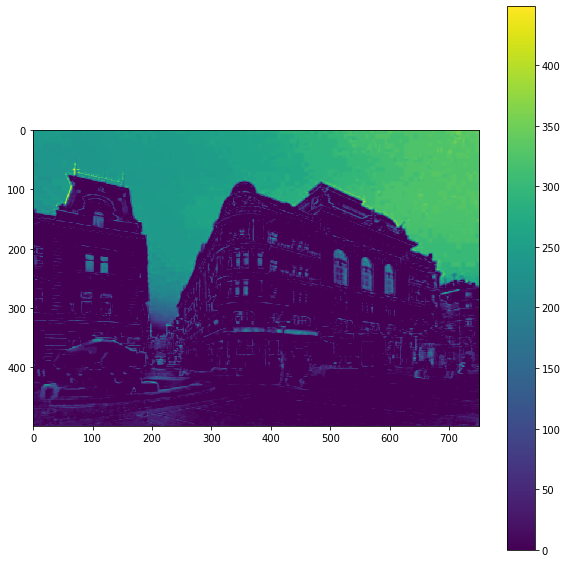

7


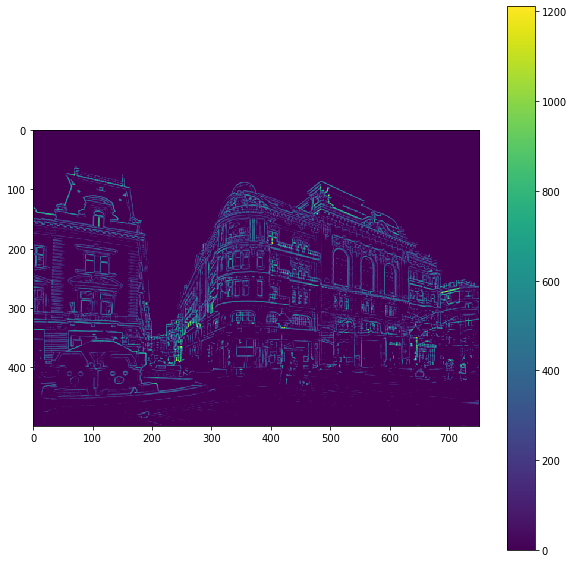

8


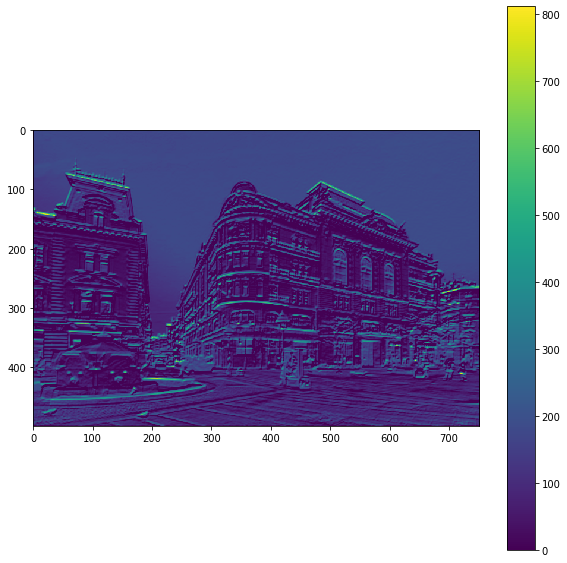

9


In [99]:
for i in range(0, 10):
  plt.figure(figsize=(10, 10))
  plt.imshow(activations[0, :, :, i])
  plt.colorbar()
  plt.show()
  print(i)

# Part 2: Gradient ascent

Make sure that model from Part 1 is loaded, currently only supports VGG


Steps


1.   Trivial approach
2.   Introduce normalized gradients
3.   Process image for plt (stretch) 
4.   Introduce low pass - blur of the input every step
5.  Introduct loss plotting
6.  Introduce visualization on 256, 512, etc.
7.   A bit better would be to do bilateral filter
8.   Introduce Jitter
9.   Introduce Rotation
10.   See what is the best combination of those
11.   Work with ResNet model



## Basic intro to gradient ascent visualization

In [0]:
#INPUT_INIT = 'RANDOM_GRAY'
#INPUT_INIT = 'RANDOM_TRIVIAL'
INPUT_INIT = 'RANDOM_LIMITED'

dim = [224, 224]

if INPUT_INIT == 'RANDOM_GRAY':
  # Gray image with random noise
  input_img_data = np.zeros((1, dim[0], dim[1], 3))
  random_chanel_noise = np.random.random((1, dim[0], dim[1], 1))
  input_img_data[0, :, :, 0] = (random_chanel_noise[0, :, :, 0] - 0.5) * 20.0 + 128.0
  input_img_data[0, :, :, 1] = (random_chanel_noise[0, :, :, 0] - 0.5) * 20.0 + 128.0
  input_img_data[0, :, :, 2] = (random_chanel_noise[0, :, :, 0] - 0.5) * 20.0 + 128.0
elif INPUT_INIT == 'RANDOM_TRIVIAL':
  input_img_data = np.random.randint(0, 255, (224, 224, 3)).astype(np.float32)
  input_img_data = np.expand_dims(input_img_data, axis=0)
elif INPUT_INIT == 'RANDOM_LIMITED':
  input_img_data = np.random.randint(120, 150, (224, 224, 3)).astype(np.float32)
  input_img_data = np.expand_dims(input_img_data, axis=0)

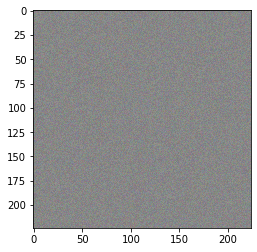

In [101]:
plt.imshow(input_img_data[0, :, :, :].astype(np.uint8))

In [102]:
if MODEL_NAME == 'VGG':
  loss = K.mean(model.layers[16].output[:, :, :, 19])
  print(model.layers[16].name)
elif MODEL_NAME == 'ResNet':
  loss = K.mean(model.layers[150].output[:, :, :, 5])
  print(model.layers[150].name)

block5_conv2


In [0]:
def normalize_gradients(g):
  #return g / (K.mean(K.abs(g)) + K.epsilon())
  return g / (K.sqrt(K.mean(K.square(g))) + K.epsilon())

grads = K.gradients([loss], [model.inputs[0]])
grads = grads[0]
grads_norm = normalize_gradients(grads)

In [0]:
iterate = K.function([model.inputs[0]], [grads, grads_norm, loss])

In [105]:
# normalized grads vs normal
# use gaussian blur, bilateral filter, jitter, rotate
# learning rate comparison - 0.05, 0.1 or 1.0, learning rate decay

# Do I need this?
# input_img_data = tf.keras.applications.vgg16.preprocess_input(input_img_data[0, :, :, :])
# input_img_data = np.expand_dims(input_img_data, axis=0)

loss_to_plot = []

for i in range(512):
  step = 0.1
  grads_value, grads_norm_value, loss_value = iterate([input_img_data])
  #input_img_data += grads_norm_value * step 

  # jitter
  input_img_data += np.random.randint(-1, 1, (1, 224, 224, 3))

  # rotate
  #input_img_data = scipy.ndimage.rotate(input_img_data[0, :, :, :].astype(np.float32), (np.random.rand() - 0.5)*5.0, reshape=False)
  #input_img_data = scipy.ndimage.rotate(input_img_data[0, :, :, :].astype(np.float32), np.random.choice([-5, 0, 5]), reshape=False)
  #input_img_data = np.expand_dims(input_img_data, axis=0)

  # blur
  input_img_data = cv2.GaussianBlur(input_img_data[0, :, :, :], (5, 5), sigmaX=0.5, sigmaY=0.5)
  #input_img_data = cv2.bilateralFilter(input_img_data[0, :, :, :].astype(np.float32), 4, 100, 100)
  input_img_data = np.expand_dims(input_img_data, axis=0)

  input_img_data += grads_norm_value * step 

  print(i, loss_value)

  loss_to_plot += [loss_value]

0 0.038940843
1 0.7792877
2 3.0294738
3 5.1893444
4 7.4859962
5 9.250524
6 11.16888
7 13.001096
8 14.763046
9 16.747833
10 18.59879
11 20.712786
12 22.84668
13 24.84862
14 27.4209
15 29.701342
16 32.70334
17 35.48924
18 38.159893
19 40.195187
20 42.72344
21 45.160885
22 47.245796
23 49.464256
24 51.366917
25 53.61331
26 55.301136
27 56.78032
28 58.672195
29 60.309875
30 62.055393
31 63.331676
32 65.58958
33 67.74797
34 69.39453
35 71.52648
36 73.11023
37 74.48447
38 75.7814
39 77.26025
40 78.10551
41 79.75176
42 80.69171
43 81.72032
44 82.99052
45 84.68468
46 85.79555
47 86.934074
48 88.11228
49 88.83405
50 90.20915
51 91.67023
52 92.62911
53 93.935196
54 95.02458
55 96.38382
56 97.55156
57 98.63341
58 99.58349
59 100.40384
60 101.895744
61 102.259544
62 102.70101
63 103.72437
64 104.33718
65 105.17694
66 105.763565
67 106.44812
68 107.34913
69 108.22917
70 108.456535
71 108.600815
72 108.80662
73 109.53138
74 110.04037
75 110.8599
76 110.91226
77 111.768234
78 111.915764
79 112.134346

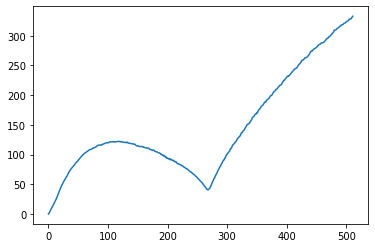

In [106]:
plt.plot(loss_to_plot)

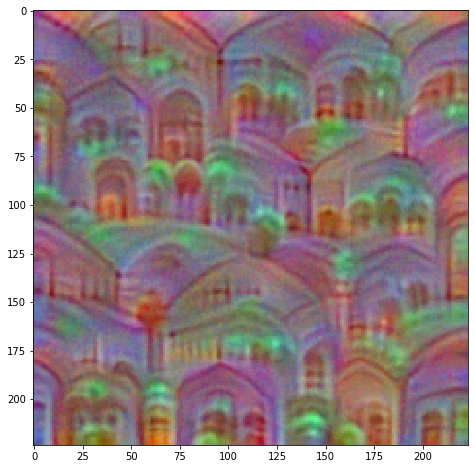

In [107]:
plt.figure(figsize=(8, 8))

def prepare_image_for_plt(img):
  img = (img - img.min()) / (img.max() - img.min())
  img = img * 255.0

  return img

plt.imshow(prepare_image_for_plt(input_img_data[0, :, :, :]).astype(np.uint8))

## Automate comparison

In [0]:
to_compare = [{'blur': False, 'jitter': False, 'bilateral': False, 'init': 'RANDOM_GRAY'},
              {'blur': True, 'jitter': False, 'bilateral': False, 'init': 'RANDOM_GRAY'},
              {'blur': True, 'jitter': True, 'bilateral': False, 'init': 'RANDOM_GRAY'},
              {'blur': False, 'jitter': True, 'bilateral': False,'init': 'RANDOM_GRAY'},
              {'blur': False, 'jitter': True, 'bilateral': True, 'init': 'RANDOM_GRAY'}]

In [0]:
def visualize_filter(model, layer_id, filter_id, params):
  INPUT_INIT = params['init']

  dim = [224, 224]

  if INPUT_INIT == 'RANDOM_GRAY':
    # Gray image with random noise
    input_img_data = np.zeros((1, dim[0], dim[1], 3))
    random_chanel_noise = np.random.random((1, dim[0], dim[1], 1))
    input_img_data[0, :, :, 0] = (random_chanel_noise[0, :, :, 0] - 0.5) * 20.0 + 128.0
    input_img_data[0, :, :, 1] = (random_chanel_noise[0, :, :, 0] - 0.5) * 20.0 + 128.0
    input_img_data[0, :, :, 2] = (random_chanel_noise[0, :, :, 0] - 0.5) * 20.0 + 128.0
  elif INPUT_INIT == 'RANDOM_TRIVIAL':
    input_img_data = np.random.randint(0, 255, (224, 224, 3)).astype(np.float32)
    input_img_data = np.expand_dims(input_img_data, axis=0)
  elif INPUT_INIT == 'RANDOM_LIMITED':
    input_img_data = np.random.randint(120, 150, (224, 224, 3)).astype(np.float32)
    input_img_data = np.expand_dims(input_img_data, axis=0)

  loss = K.mean(model.layers[layer_id].output[:, :, :, filter_id])

  def normalize_gradients(g):
    #return g / (K.abs(g) + K.epsilon())
    return g / (K.sqrt(K.mean(K.square(g))) + K.epsilon())

  grads = K.gradients([loss], [model.inputs[0]])
  grads = grads[0]
  grads_norm = normalize_gradients(grads)


  for i in range(256):
    step = 0.1
    grads_value, grads_norm_value, loss_value = iterate([input_img_data])
    #input_img_data += grads_norm_value * step

    # jitter
    if params['jitter']:
      input_img_data += np.random.randint(-1, 1, (1, 224, 224, 3))

    # rotate
    #input_img_data = scipy.ndimage.rotate(input_img_data[0, :, :, :].astype(np.float32), (np.random.rand() - 0.5)*5.0, reshape=False)
    #input_img_data = np.expand_dims(input_img_data, axis=0)

    # blur
    if params['blur']:
      input_img_data = cv2.GaussianBlur(input_img_data[0, :, :, :], (5, 5), sigmaX=0.5, sigmaY=0.5)
      input_img_data = np.expand_dims(input_img_data, axis=0)
    if params['bilateral']:
      input_img_data = cv2.bilateralFilter(input_img_data[0, :, :, :].astype(np.float32), 4, 100, 100)
      input_img_data = np.expand_dims(input_img_data, axis=0)

    input_img_data += grads_norm_value * step 

    #print(i, loss_value)

  return prepare_image_for_plt(input_img_data[0, :, :, :]).astype(np.uint8)

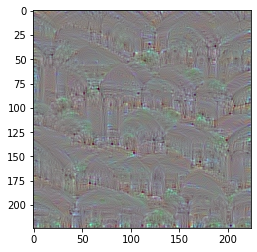

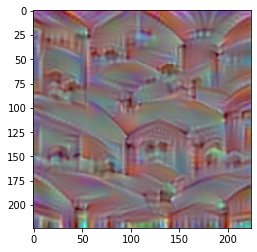

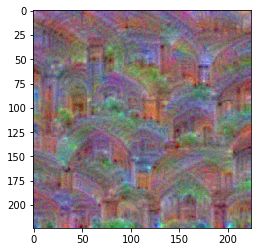

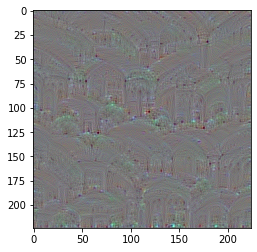

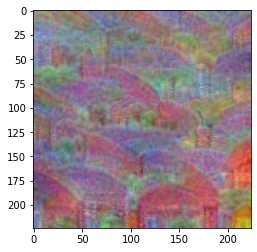

In [110]:
for params in to_compare:
  plt.figure()
  img = visualize_filter(model, 16, 19, params)
  plt.imshow(img)
  plt.show()